### EDA_Accesos Por Tecnología.ipynb

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo 
regulador de las telecomunicaciones en el país. Esta información permite evaluar el estado y la evolución del acceso a 
internet en Argentina.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Accesos a internet por tipo de tecnología."**, que proporciona información 
detallada sobre el estado de los accesos a internet en el país.

### Objetivo del Análisis
El propósito de este análisis es **explorar y visualizar los datos** para identificar tendencias, patrones y posibles 
anomalías en la información. Se aplicarán métodos de **Análisis Exploratorio de Datos (EDA)** para obtener insights 
valiosos.

In [5]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Accesos Por Tecnología.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [6]:
# Extraer el nombre de las columnas
nombres_columnas = df.columns.tolist()
print("Nombres de las columnas:")
print(nombres_columnas)

Nombres de las columnas:
['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra Óptica', 'Wireless', 'Otros', 'Total']


In [7]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           1009 non-null   int64 
 1   Trimestre     1009 non-null   int64 
 2   Provincia     1007 non-null   object
 3   ADSL          1009 non-null   int64 
 4   Cablemodem    1009 non-null   int64 
 5   Fibra Óptica  1009 non-null   int64 
 6   Wireless      1009 non-null   int64 
 7   Otros         1009 non-null   int64 
 8   Total         1009 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 71.1+ KB
None
    Año  Trimestre     Provincia    ADSL  Cablemodem  Fibra Óptica  Wireless  \
0  2024          2  BUENOS AIRES  214055     2722466       1849476    138638   
1  2024          2          CABA   54102     1144781        230402      4493   
2  2024          2     CATAMARCA    4951       10303         58355      1384   
3  2024          2         CHACO    9448       57935    

In [8]:
# Convertir las columnas especificadas a tipo int
columnas_a_convertir = ['ADSL', 'Cablemodem', 'Fibra Óptica', 'Wireless', 'Otros', 'Total']

# Rellenar valores nulos con 0 antes de la conversión
df[columnas_a_convertir] = df[columnas_a_convertir].fillna(0)

# Convertir las columnas a tipo int
df[columnas_a_convertir] = df[columnas_a_convertir].astype(int)

# Verificar la conversión
print(df[columnas_a_convertir].dtypes)

ADSL            int64
Cablemodem      int64
Fibra Óptica    int64
Wireless        int64
Otros           int64
Total           int64
dtype: object


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           1009 non-null   int64 
 1   Trimestre     1009 non-null   int64 
 2   Provincia     1007 non-null   object
 3   ADSL          1009 non-null   int64 
 4   Cablemodem    1009 non-null   int64 
 5   Fibra Óptica  1009 non-null   int64 
 6   Wireless      1009 non-null   int64 
 7   Otros         1009 non-null   int64 
 8   Total         1009 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 71.1+ KB
None


In [10]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a valores numéricos, forzando errores a NaN
    df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce')
    
    # Revisar si hay valores negativos en "Trimestre"
    if (df['Trimestre'] < 0).any():
        print(f"Se encontraron {df['Trimestre'][df['Trimestre'] < 0].count()} valores negativos en 'Trimestre'. Corrigiéndolos a 0.")
        df.loc[df['Trimestre'] < 0, 'Trimestre'] = 0
    
    # Manejar valores nulos en "Trimestre" sin reemplazarlos con -1
    if df['Trimestre'].isnull().any():
        print(f"Se encontraron {df['Trimestre'].isnull().sum()} valores nulos en 'Trimestre'. No se reemplazarán con -1.")
    
    # Establecer condiciones basadas en la columna "Año"
    if 'Año' in df.columns:
        # Si no existe fecha en "Año", colocar 0 en "Trimestre"
        df.loc[df['Año'].isnull() & df['Trimestre'].isnull(), 'Trimestre'] = 0
        # Si hay fecha en "Año" pero no registro en "Trimestre", colocar 5
        df.loc[df['Año'].notnull() & df['Trimestre'].isnull(), 'Trimestre'] = 5

    # Intentar convertir la columna "Trimestre" a tipo int64
    try:
        df['Trimestre'] = df['Trimestre'].astype(int)
        print("La columna 'Trimestre' ha sido convertida a int.")
    except ValueError as e:
        print(f"No se pudo convertir la columna 'Trimestre' a int debido a un error: {e}")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' ha sido convertida a int.


In [11]:
# Verificar si existe la columna "Año"
if 'Año' in df.columns:
    # Reemplazar valores no numéricos y nulos con un valor específico, por ejemplo, 0
    df['Año'] = pd.to_numeric(df['Año'], errors='coerce').fillna(0).astype(int)
    print("La columna 'Año' ha sido convertida a int.")
else:
    print("La columna 'Año' no existe en el DataFrame.")

La columna 'Año' ha sido convertida a int.


In [12]:
print(df.head())

    Año  Trimestre     Provincia    ADSL  Cablemodem  Fibra Óptica  Wireless  \
0  2024          2  BUENOS AIRES  214055     2722466       1849476    138638   
1  2024          2          CABA   54102     1144781        230402      4493   
2  2024          2     CATAMARCA    4951       10303         58355      1384   
3  2024          2         CHACO    9448       57935         68944      8407   
4  2024          2        CHUBUT   25955       80704         26516     31118   

   Otros    Total  
0  64745  4989380  
1  29821  1463599  
2     81    75074  
3   2358   147092  
4   9930   174223  


In [13]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' no tenga valores nulos ni valores fuera del rango esperado (1-4)
    df['Trimestre'] = df['Trimestre'].fillna(-1)  # Rellena nulos con -1 para evitar errores
    df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').fillna(-1).astype(int)  # Convertir a numérico y manejar errores

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels).fillna('Sin etiqueta')  # Agregar etiqueta para valores no válidos
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")
    # Identificar y reemplazar valores nulos por la moda en todas las columnas
    for columna in df.columns:
        if df[columna].isnull().any():
            moda = df[columna].mode()[0]
            df[columna].fillna(moda, inplace=True)
            print(f"Valores nulos en la columna '{columna}' han sido reemplazados por la moda: {moda}")

    # Crear la columna 'Trimestre_Label' basada en 'Trimestre' nuevamente después de reemplazar nulos
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels).fillna('Sin etiqueta')
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas después de reemplazar nulos.")

Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [14]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Año              1009 non-null   int64 
 1   Trimestre        1009 non-null   int64 
 2   Provincia        1007 non-null   object
 3   ADSL             1009 non-null   int64 
 4   Cablemodem       1009 non-null   int64 
 5   Fibra Óptica     1009 non-null   int64 
 6   Wireless         1009 non-null   int64 
 7   Otros            1009 non-null   int64 
 8   Total            1009 non-null   int64 
 9   Trimestre_Label  1009 non-null   object
dtypes: int64(8), object(2)
memory usage: 79.0+ KB
None


In [15]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [16]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'CABA',
        'CAPITAL FEDERAL': 'CABA',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario y dependiente del archivo
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")



Valores únicos en 'Provincia' después de los reemplazos:
['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CÓRDOBA' 'CORRIENTES'
 'ENTRE RÍOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUÉN' 'RÍO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMÁN' nan]
La columna 'Partido' no existe en el DataFrame.
La columna 'Localidad' no existe en el DataFrame.


In [17]:

# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Accesos Por Tecnología.csv


In [18]:
import sweetviz as sv
from skimpy import skim

c:\Program Files\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Año              1009 non-null   int64 
 1   Trimestre        1009 non-null   int64 
 2   Provincia        1007 non-null   object
 3   ADSL             1009 non-null   int64 
 4   Cablemodem       1009 non-null   int64 
 5   Fibra Óptica     1009 non-null   int64 
 6   Wireless         1009 non-null   int64 
 7   Otros            1009 non-null   int64 
 8   Total            1009 non-null   int64 
 9   Trimestre_Label  1009 non-null   object
dtypes: int64(8), object(2)
memory usage: 79.0+ KB
None
    Año  Trimestre     Provincia    ADSL  Cablemodem  Fibra Óptica  Wireless  \
0  2024          2  BUENOS AIRES  214055     2722466       1849476    138638   
1  2024          2          CABA   54102     1144781        230402      4493   
2  2024          2     CATAMARCA    4951       10303     

In [20]:
from skimpy import skim

# Resumen del DataFrame
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1009   │ │ int64       │ 8     │                                                          │
│ │ Number of columns │ 10     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column          ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0  ┃ p25    ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Año             │   0 │     0 │     1871 │    526.5 │   0 │   2015 │    2018 │    2021 │     2024 │ ▁    ▇ │  │
│ │ Trimestre       │   0 │     0 │    2.668 │     1.27 │   0 │      2 │       3 │       4 │        5 │  ▇▇▇▇▂ │  │
│ │ ADSL            │   0 │     0 │   112700 │   236100 │   0 │  19790 │   43960 │   86550 │  1586000 │   ▇▁   │  │
│ │ Cablemodem      │   0 │     0 │   181800 │   445600 │   0 │  11010 │   40410 │   76430 │  2798000 │   ▇    │  │
│ │ Fibra Óptica    │   0 │     0 │    48460 │   175700 │   0 │    354 │    3014 │   29120 │  1849000 │   ▇    │  │
│ │ Wireless        │   0 │     0 │    12520 │    20900 │   0 │    812 │    5203 │   14290 │   138600 │   ▇▁   │  │
│ │ Otros           │   0 │     0 │     6484 │    11230 │   0 │    332 │    1882 │    7545 │    73420 │   ▇▁   │  │
│ │ Total           │   0 │     0 │   362000 │   776700 │   0 │  62380 │  113800 │  195500 │  5012000 │   ▇▁   │  │
│ └─────────────────┴─────┴───────┴──────────┴──────────┴─────┴────────┴─────────┴─────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃    ┃           ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA ┃ NA %      ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Provincia │  2 │ 0.1982160 │ CABA     │ SANTIAGO  │ BUENOS   │ TUCUMÁN   │     8.45 │       1.5 │     1552 │  │
│ │           │    │ 555004955 │          │ DEL       │ AIRES    │           │          │           │          │  │
│ │           │    │         4 │          │ ESTERO    │          │           │          │           │          │  │
│ │ Trimestre │  0 │         0 │ Q2       │ Sin       │ Q1       │ Sin       │     2.73 │       1.1 │     1083 │  │
│ │ _Label    │    │           │          │ etiqueta  │          │ etiqueta  │          │           │          │  │
│ └───────────┴────┴───────────┴──────────┴───────────┴──────────┴───────────┴──────────┴───────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯


Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
                Año    Trimestre Provincia          ADSL    Cablemodem  \
count   1009.000000  1009.000000      1007  1.009000e+03  1.009000e+03   
unique          NaN          NaN        24           NaN           NaN   
top             NaN          NaN      CABA           NaN           NaN   
freq            NaN          NaN        42           NaN           NaN   
mean    1870.683845     2.667988       NaN  1.127070e+05  1.817972e+05   
std      526.541942     1.269989       NaN  2.361111e+05  4.456368e+05   
min        0.000000     0.000000       NaN  0.000000e+00  0.000000e+00   
25%     2015.000000     2.000000       NaN  1.978900e+04  1.101200e+04   
50%     2018.000000     3.000000       NaN  4.396400e+04  4.040700e+04   
75%     2021.000000     4.000000       NaN  8.654800e+04  7.642700e+04   
max     2024.000000     5.000000       NaN  1.586343e+06  2.797700e+06   

        Fibra Óptica       Wireless  

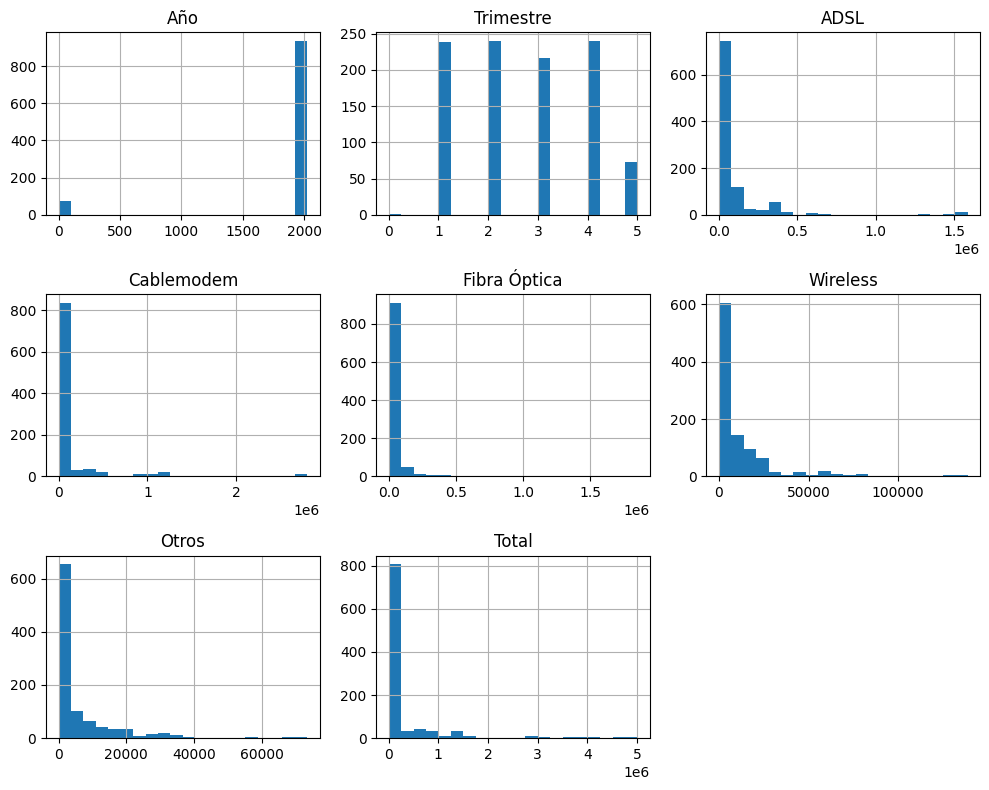

In [21]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
                   Año  Trimestre      ADSL  Cablemodem  Fibra Óptica  \
Año           1.000000  -0.502206 -0.024153   -0.002940      0.046484   
Trimestre    -0.502206   1.000000  0.017401    0.014156     -0.018405   
ADSL         -0.024153   0.017401  1.000000    0.661427      0.259113   
Cablemodem   -0.002940   0.014156  0.661427    1.000000      0.782644   
Fibra Óptica  0.046484  -0.018405  0.259113    0.782644      1.000000   
Wireless      0.002827   0.013424  0.297841    0.654969      0.770042   
Otros        -0.071860   0.057391  0.448077    0.798186      0.697495   
Total         0.000523   0.010439  0.756592    0.981030      0.784833   

              Wireless     Otros     Total  
Año           0.002827 -0.071860  0.000523  
Trimestre     0.013424  0.057391  0.010439  
ADSL          0.297841  0.448077  0.756592  
Cablemodem    0.654969  0.798186  0.981030  
Fibra Óptica  0.770042  0.697495  0.784833  
Wireless      1.000000 

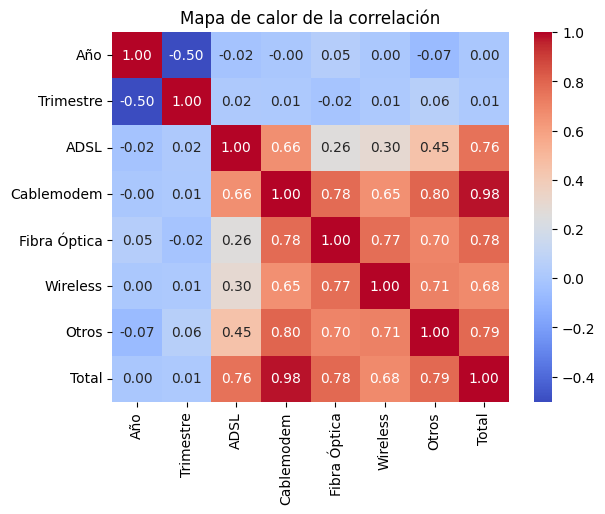

In [22]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


Cablemodem y Fibra óptica son los principales impulsores del total de accesos, mientras que ADSL tiene menor impacto. Wireless también juega un papel importante.

In [23]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Provincia y Trimestre_Label:
Trimestre_Label      Q1  Q2  Q3  Q4  Sin etiqueta
Provincia                                        
BUENOS AIRES          9  10   9  10             3
CABA                 10  10   9  10             3
CATAMARCA            10  10   9  10             3
CHACO                10  10   9  10             3
CHUBUT               10  10   9  10             3
CORRIENTES           10  10   9  10             3
CÓRDOBA              10  10   9  10             3
ENTRE RÍOS           10  10   9  10             3
FORMOSA              10  10   9  10             3
JUJUY                10  10   9  10             3
LA PAMPA             10  10   9  10             3
LA RIOJA             10  10   9  10             3
MENDOZA              10  10   9  10             3
MISIONES             10  10   9  10             3
NEUQUÉN              10  10   9  10             3
RÍO NEGRO            10  10   9  10             3
SALTA                10  10   9  10        

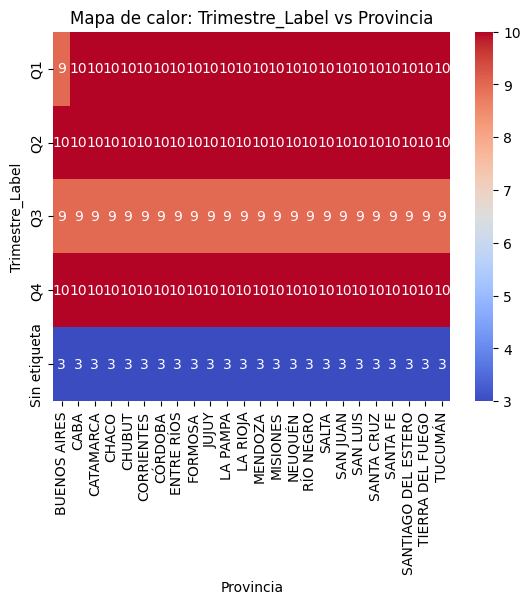

In [24]:
# Visualizar una tabla de contingencia específica como mapa de calor
tabla_contingencia = pd.crosstab(df['Trimestre_Label'], df['Provincia'])
sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
plt.title("Mapa de calor: Trimestre_Label vs Provincia")
plt.show()


Tabla de contingencia entre Provincia y Trimestre_Label:
Trimestre_Label      Q1  Q2  Q3  Q4  Sin etiqueta
Provincia                                        
BUENOS AIRES          9  10   9  10             3
CABA                 10  10   9  10             3
CATAMARCA            10  10   9  10             3
CHACO                10  10   9  10             3
CHUBUT               10  10   9  10             3
CORRIENTES           10  10   9  10             3
CÓRDOBA              10  10   9  10             3
ENTRE RÍOS           10  10   9  10             3
FORMOSA              10  10   9  10             3
JUJUY                10  10   9  10             3
LA PAMPA             10  10   9  10             3
LA RIOJA             10  10   9  10             3
MENDOZA              10  10   9  10             3
MISIONES             10  10   9  10             3
NEUQUÉN              10  10   9  10             3
RÍO NEGRO            10  10   9  10             3
SALTA                10  10   9  10        

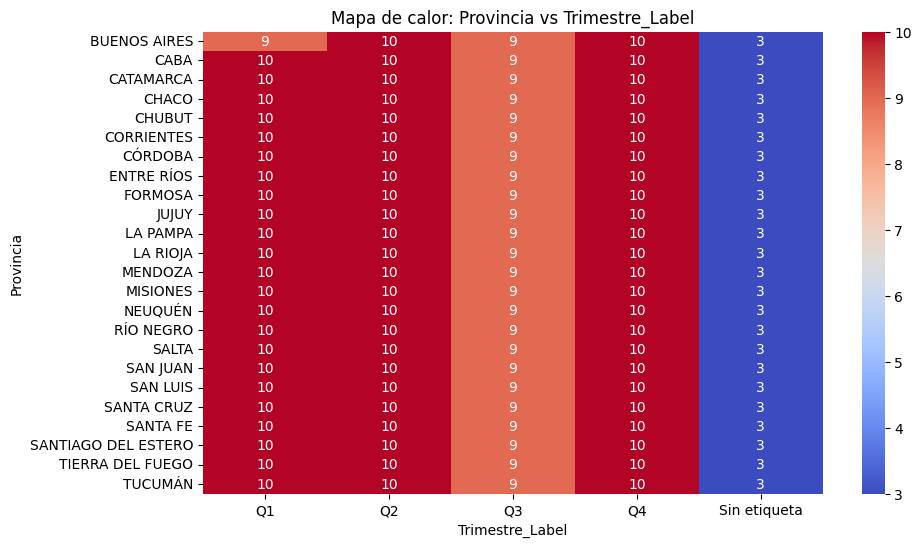

Tabla de contingencia entre Trimestre_Label y Provincia:
Provincia        BUENOS AIRES  CABA  CATAMARCA  CHACO  CHUBUT  CORRIENTES  \
Trimestre_Label                                                             
Q1                          9    10         10     10      10          10   
Q2                         10    10         10     10      10          10   
Q3                          9     9          9      9       9           9   
Q4                         10    10         10     10      10          10   
Sin etiqueta                3     3          3      3       3           3   

Provincia        CÓRDOBA  ENTRE RÍOS  FORMOSA  JUJUY  ...  NEUQUÉN  RÍO NEGRO  \
Trimestre_Label                                       ...                       
Q1                    10          10       10     10  ...       10         10   
Q2                    10          10       10     10  ...       10         10   
Q3                     9           9        9      9  ...        9          9  

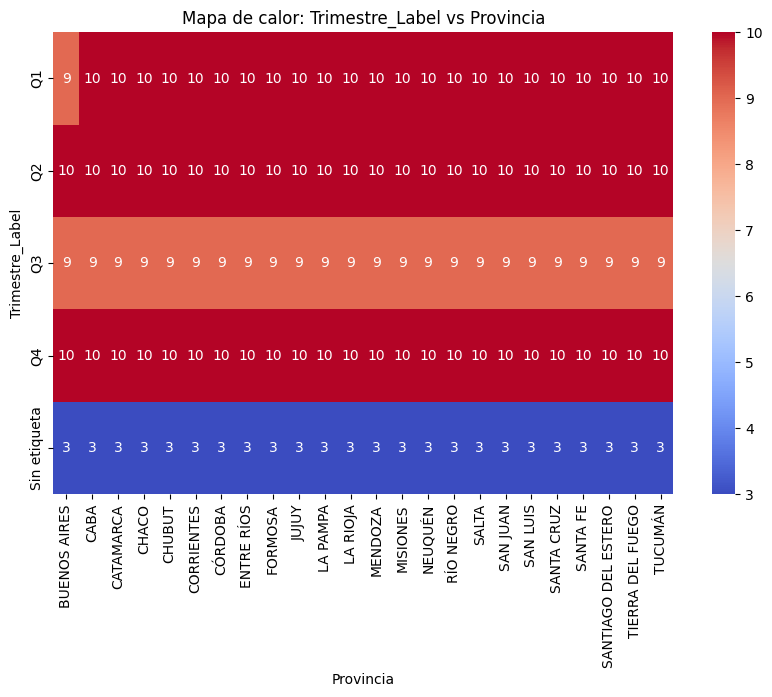

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


In [26]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
           Año  Trimestre      ADSL  Cablemodem  Fibra Óptica  Wireless  \
0     0.291320  -0.526240  0.429451    5.704037     10.255124  6.038595   
1     0.291320  -0.526240 -0.248333    2.161988      1.035988 -0.384203   
2     0.291320  -0.526240 -0.456605   -0.385020      0.056339 -0.533060   
3     0.291320  -0.526240 -0.437549   -0.278082      0.116633 -0.196802   
4     0.291320  -0.526240 -0.367602   -0.226964     -0.124955  0.890589   
...        ...        ...       ...         ...           ...       ...   
1004  0.272319  -1.314039 -0.339585   -0.400074     -0.275831 -0.555516   
1005  0.272319  -1.314039 -0.385980   -0.401782     -0.272250 -0.599278   
1006  0.272319  -1.314039  0.072078   -0.407965     -0.275250 -0.598703   
1007 -3.554535  -2.101837 -0.477584   -0.408152     -0.275939 -0.599326   
1008 -3.554535   1.837156 -0.477584   -0.408152     -0.275939 -0.599326   

         Otros     Total  
0     5.189418  5.960666  
1     2.

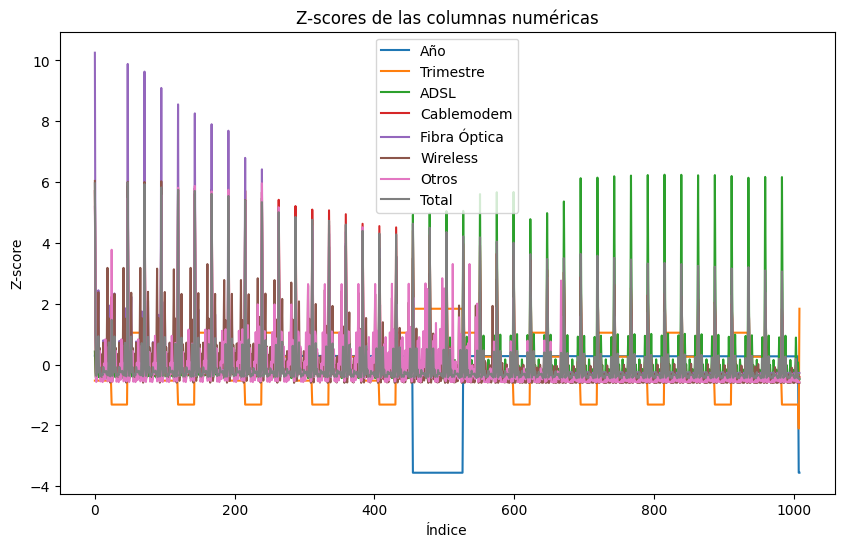

In [27]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


 Las fluctuaciones en Wireless, Fibra óptica y Cablemodem pueden indicar cambios abruptos en la adopción de estas tecnologías. Se recomienda investigar los valores atípicos para entender mejor su impacto.

In [28]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Provincia':
Provincia
CABA                   42
CATAMARCA              42
CHACO                  42
CHUBUT                 42
CORRIENTES             42
CÓRDOBA                42
ENTRE RÍOS             42
FORMOSA                42
SALTA                  42
JUJUY                  42
LA PAMPA               42
LA RIOJA               42
MENDOZA                42
MISIONES               42
NEUQUÉN                42
RÍO NEGRO              42
SANTA FE               42
SAN JUAN               42
SAN LUIS               42
SANTA CRUZ             42
TIERRA DEL FUEGO       42
SANTIAGO DEL ESTERO    42
TUCUMÁN                42
BUENOS AIRES           41
Name: count, dtype: int64

Conteo de categorías en la columna 'Trimestre_Label':
Trimestre_Label
Q2              240
Q4              240
Q1              239
Q3              216
Sin etiqueta     74
Name: count, dtype: int64


In [29]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


In [30]:
# Verificar registros sin etiqueta en la columna 'Trimestre_Label'
sin_etiqueta = df[df['Trimestre_Label'] == 'Sin etiqueta']
print("\nRegistros sin etiqueta en 'Trimestre_Label':")
print(sin_etiqueta)



Registros sin etiqueta en 'Trimestre_Label':
      Año  Trimestre            Provincia     ADSL  Cablemodem  Fibra Óptica  \
455     0          5         BUENOS AIRES  1277249     2144956        425386   
456     0          5                 CABA   300288     1080973         24900   
457     0          5            CATAMARCA    24349        5543            13   
458     0          5                CHACO    50416       49156          8063   
459     0          5               CHUBUT    37298       27090          1917   
...   ...        ...                  ...      ...         ...           ...   
524     0          5  SANTIAGO DEL ESTERO    25337       61547            23   
525     0          5     TIERRA DEL FUEGO    19789       23549          1623   
526     0          5              TUCUMÁN   159215       11670           118   
1007    0          0                  NaN        0           0             0   
1008    0          5                  NaN        0           0            

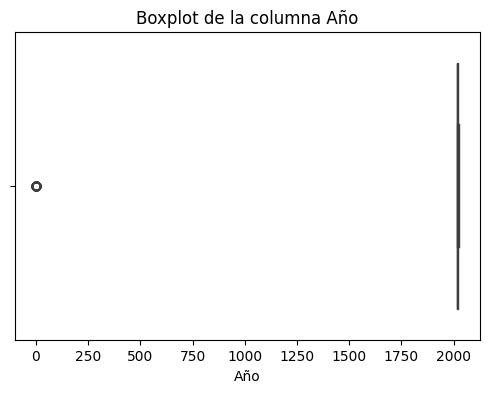

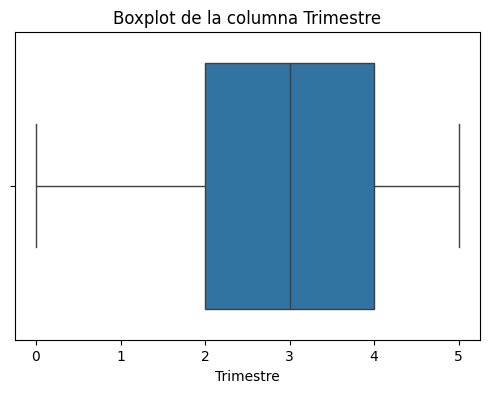

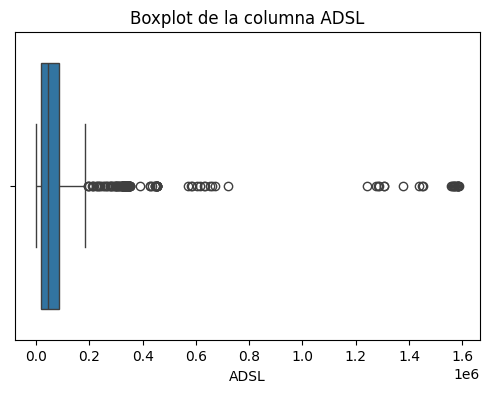

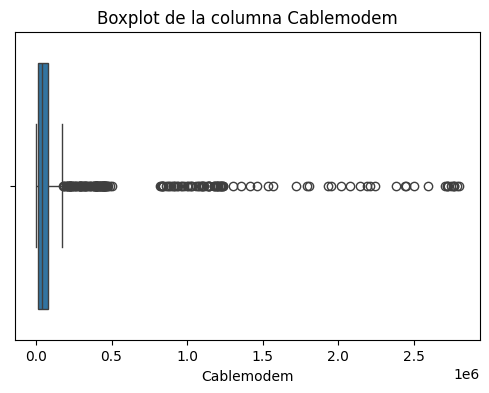

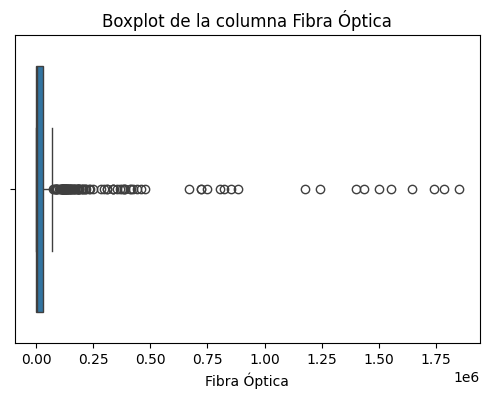

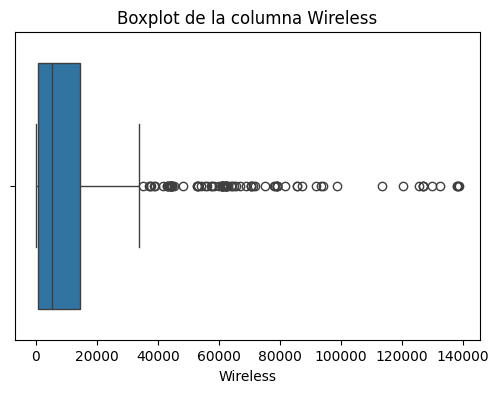

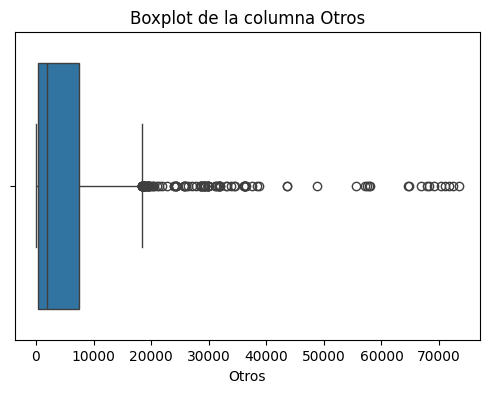

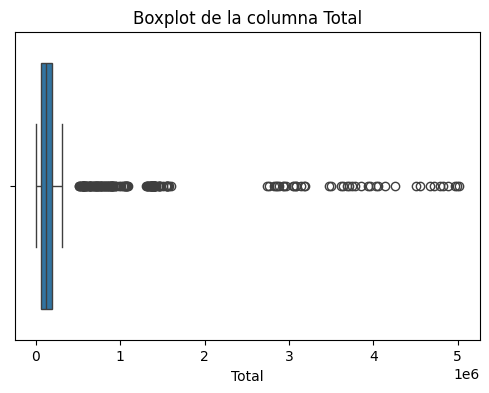

In [31]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [32]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Año                0
Trimestre          0
Provincia          2
ADSL               0
Cablemodem         0
Fibra Óptica       0
Wireless           0
Otros              0
Total              0
Trimestre_Label    0
dtype: int64


In [33]:
# Visualizar distribuciones de columnas con valores negativos
for columna in columnas_negativas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[columna], kde=True, bins=20)
    plt.title(f"Distribución de la columna '{columna}' con valores negativos")
    plt.show()

In [34]:
# Contar cuántos valores negativos hay en cada columna
for columna in columnas_negativas:
    negativos = df[columna] < 0
    print(f"\nValores negativos en la columna '{columna}': {negativos.sum()}")

In [35]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Accesos Por Tecnología.csv


In [36]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Año            -3.277952
Trimestre       0.146198
ADSL            4.665647
Cablemodem      3.873548
Fibra Óptica    7.082133
Wireless        3.265392
Otros           3.109119
Total           3.887301
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Año              8.762822
Trimestre       -1.142328
ADSL            23.952744
Cablemodem      16.057495
Fibra Óptica    56.866955
Wireless        12.710555
Otros           11.829976
Total           15.953653
dtype: float64


In [37]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
       Variable        VIF
0         const  34.954387
1           Año   1.357533
2     Trimestre   1.338754
3          ADSL        inf
4    Cablemodem        inf
5  Fibra Óptica        inf
6      Wireless        inf
7         Otros        inf
8         Total        inf


c:\Program Files\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


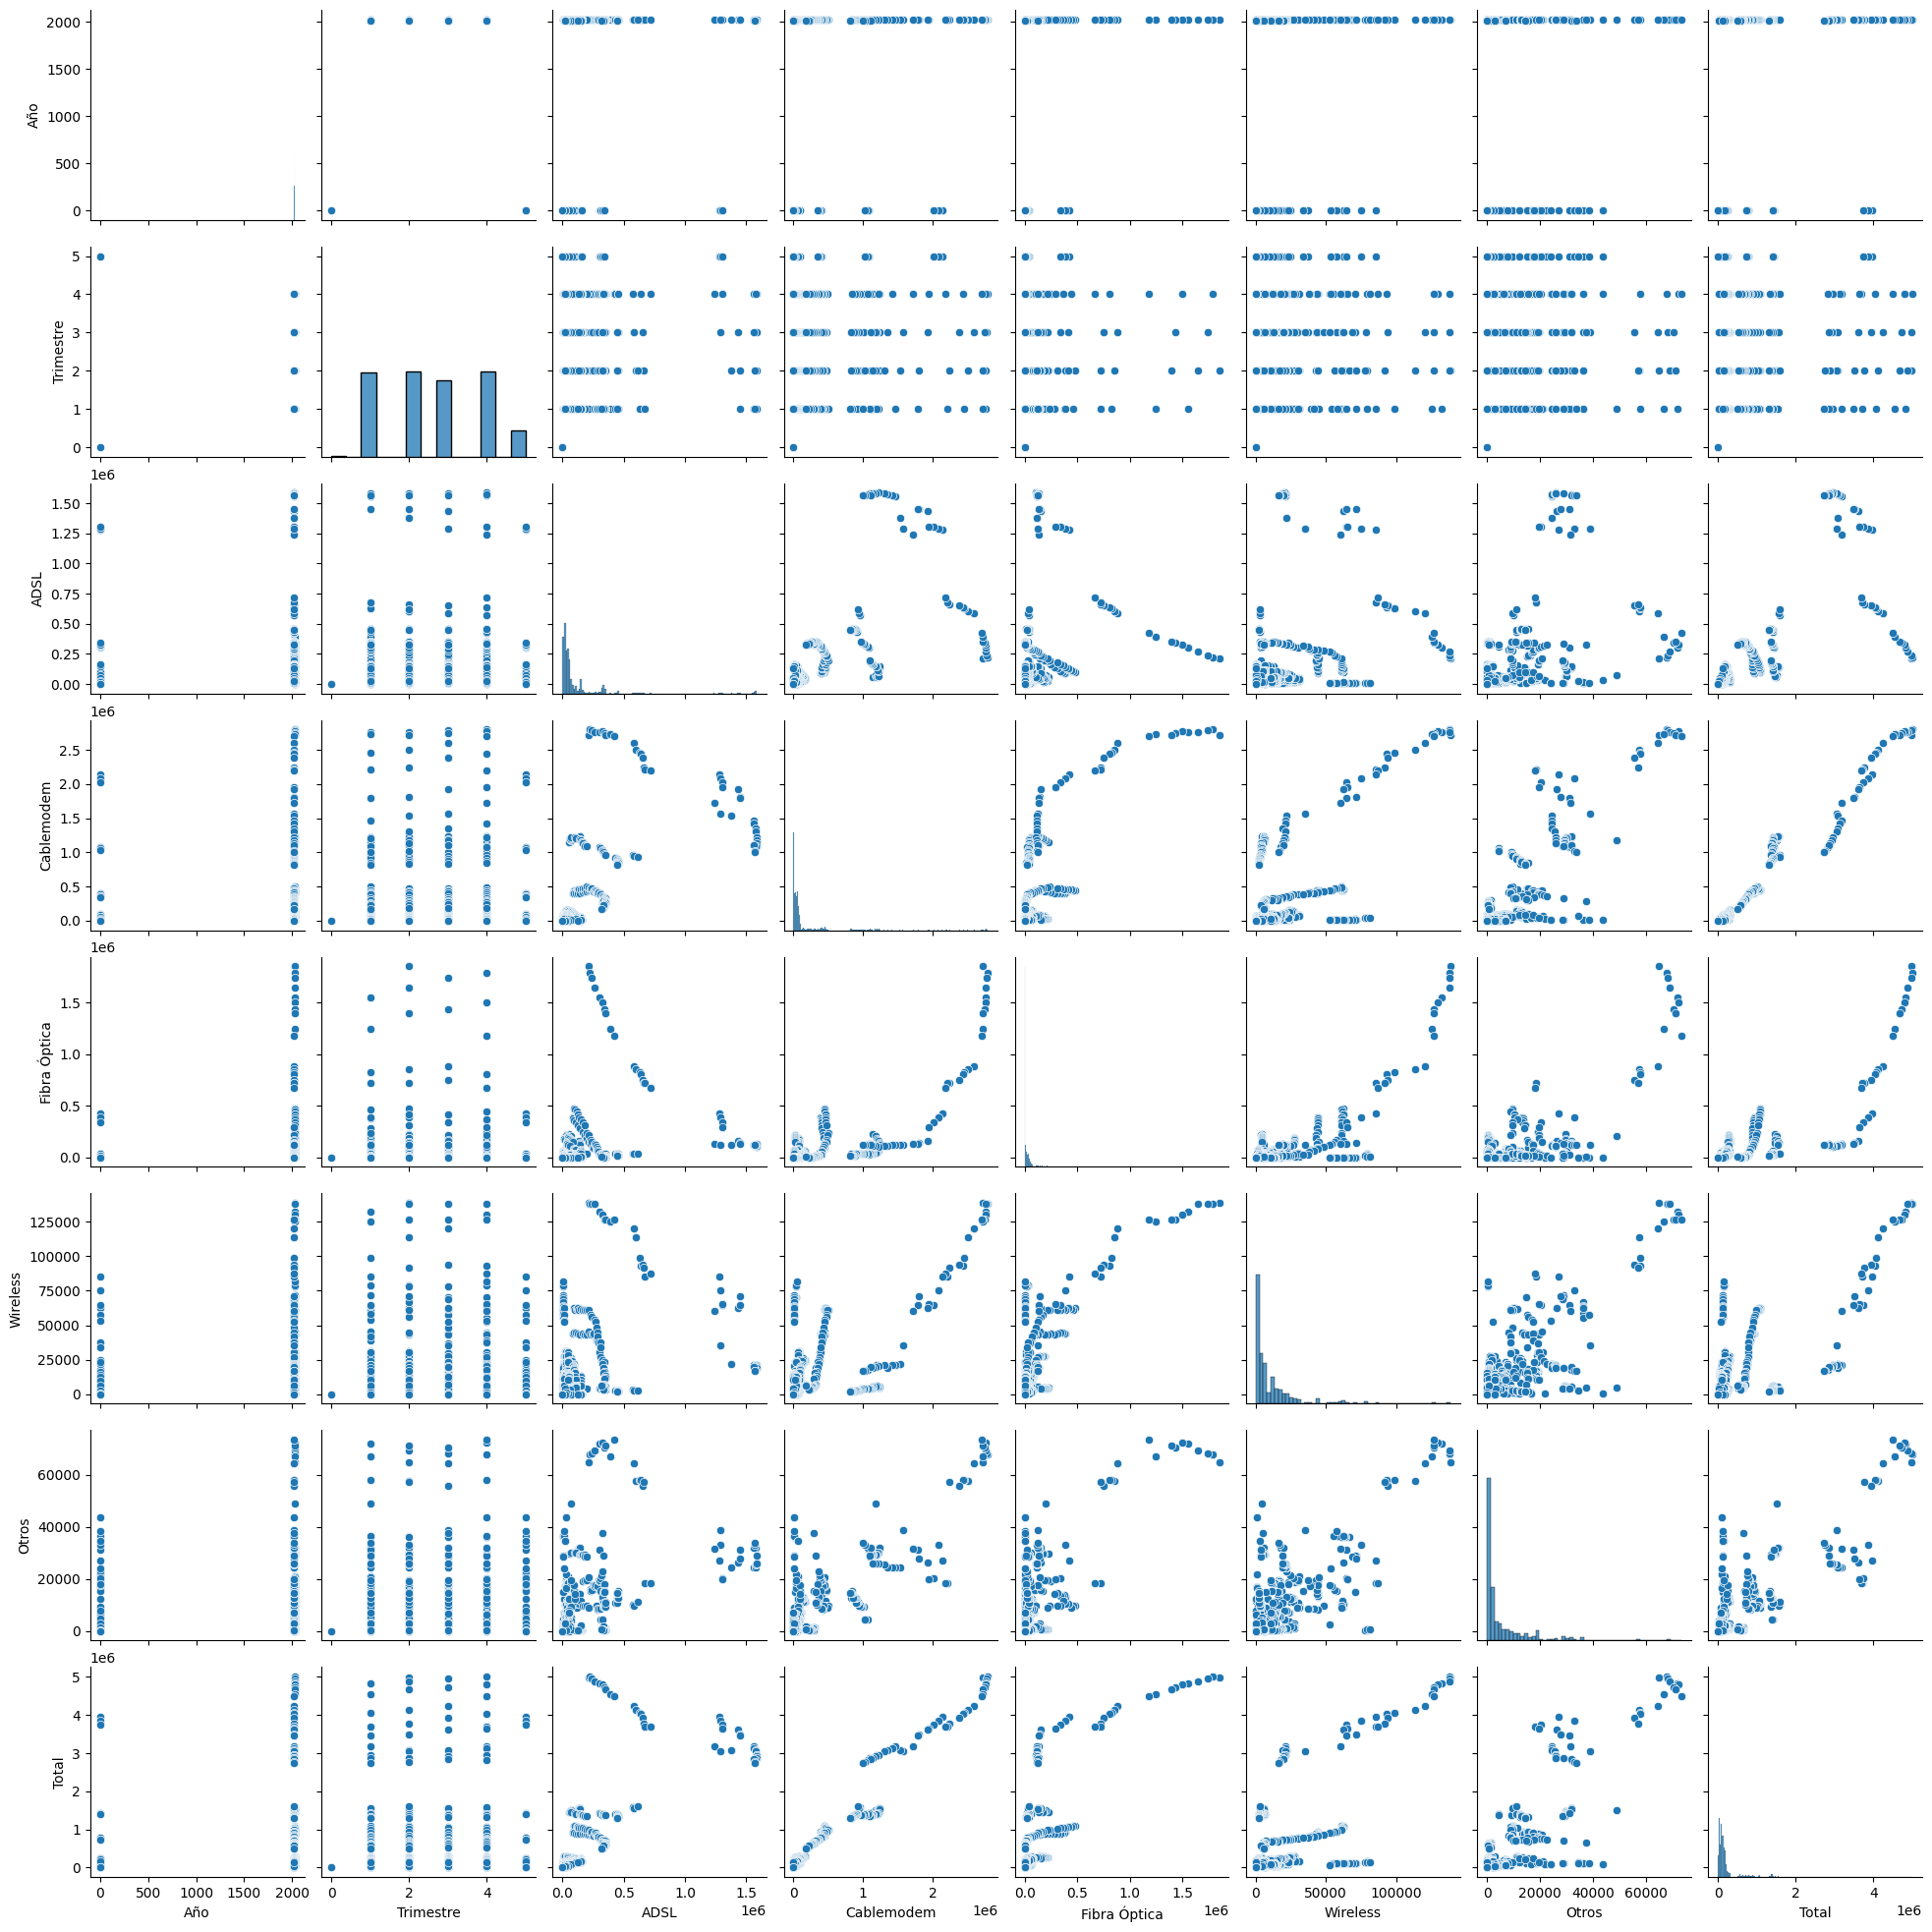

In [38]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [39]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Provincia':
                      Año                                                 \
                    count         mean         std  min      25%     50%   
Provincia                                                                  
BUENOS AIRES         41.0  1870.902439  532.217052  0.0  2015.00  2018.0   
CABA                 42.0  1874.547619  526.217066  0.0  2015.25  2018.0   
CATAMARCA            42.0  1874.547619  526.217066  0.0  2015.25  2018.0   
CHACO                42.0  1874.547619  526.217066  0.0  2015.25  2018.0   
CHUBUT               42.0  1874.547619  526.217066  0.0  2015.25  2018.0   
CORRIENTES           42.0  1874.547619  526.217066  0.0  2015.25  2018.0   
CÓRDOBA              42.0  1874.547619  526.217066  0.0  2015.25  2018.0   
ENTRE RÍOS           42.0  1874.547619  526.217066  0.0  2015.25  2018.0   
FORMOSA              42.0  1874.547619  526.217066  0.0  2015.25  2018.0   
JUJUY                42.0  1874.547619  526.2170

In [40]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0



Estadísticas por grupo de 'Provincia':
                             Año  Trimestre          ADSL    Cablemodem  \
Provincia                                                                 
BUENOS AIRES         1870.902439   2.707317  1.027615e+06  1.967608e+06   
CABA                 1874.547619   2.666667  2.934672e+05  1.038165e+06   
CATAMARCA            1874.547619   2.666667  2.119600e+04  5.015857e+03   
CHACO                1874.547619   2.666667  4.395002e+04  4.467529e+04   
CHUBUT               1874.547619   2.666667  4.433895e+04  3.097721e+04   
CORRIENTES           1874.547619   2.666667  4.744290e+04  4.922371e+04   
CÓRDOBA              1874.547619   2.666667  2.753944e+05  3.667386e+05   
ENTRE RÍOS           1874.547619   2.666667  8.888974e+04  9.256955e+04   
FORMOSA              1874.547619   2.666667  1.937721e+04  1.042748e+04   
JUJUY                1874.547619   2.666667  2.792390e+04  2.909938e+04   
LA PAMPA             1874.547619   2.666667  1.154681e+04  5

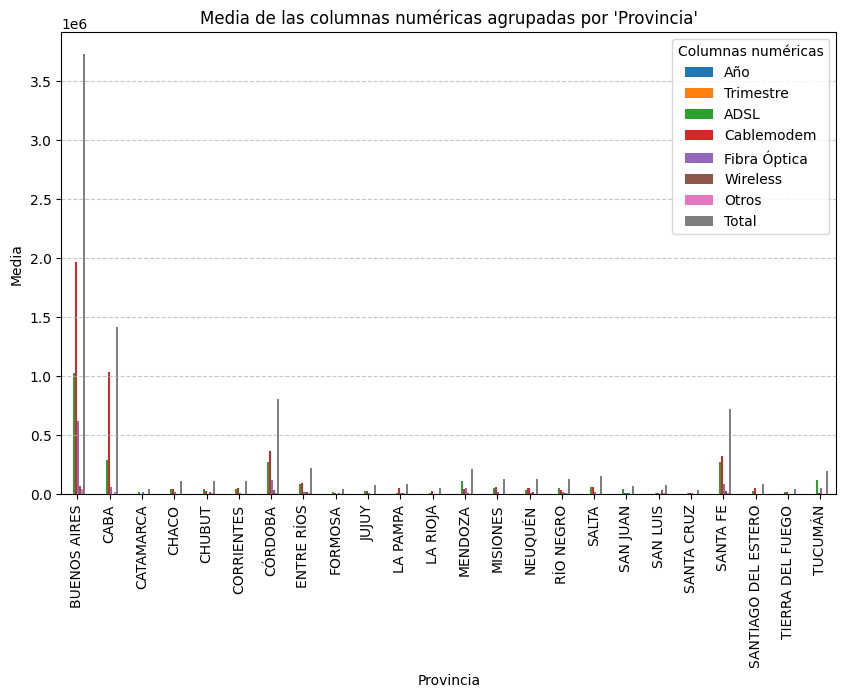


Estadísticas por grupo de 'Trimestre_Label':
                         Año  Trimestre           ADSL     Cablemodem  \
Trimestre_Label                                                         
Q1               2018.979079   1.000000  110093.753138  170460.564854   
Q2               2019.000000   2.000000  108591.562500  184023.016667   
Q3               2018.444444   3.000000  115424.148148  183239.481481   
Q4               2018.500000   4.000000  111004.566667  187820.654167   
Sin etiqueta        0.000000   4.932432  132084.905405  187447.364865   

                 Fibra Óptica      Wireless        Otros          Total  
Trimestre_Label                                                          
Q1               45900.891213  11895.665272  6006.004184  344356.878661  
Q2               57546.891667  12937.133333  6116.691667  369215.295833  
Q3               47437.828704  12258.912037  6218.532407  364578.902778  
Q4               51499.437500  12964.320833  6665.975000  369954.954167 

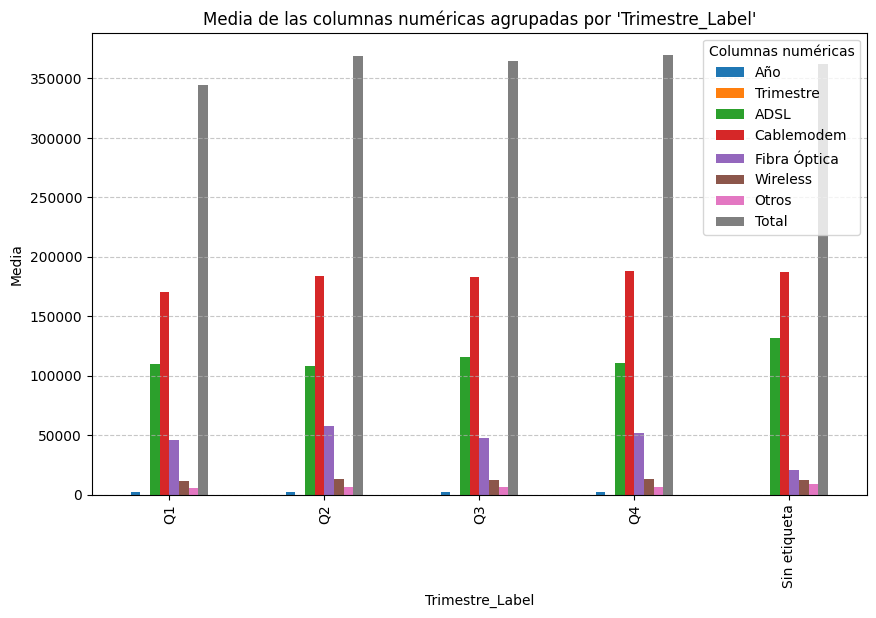

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Análisis Exploratorio de Datos (EDA) - Accesos Por Tecnología

Este cuaderno de Jupyter contiene un proceso integral de análisis y limpieza de datos aplicado al conjunto de datos denominado **"Accesos Por Tecnología.csv"**. El objetivo principal es garantizar que los datos sean claros, consistentes y estén preparados para análisis posteriores.

## Tabla de Contenidos

1. [Introducción](#introducción)
2. [Carga y Normalización de Datos](#carga-y-normalización-de-datos)
3. [Gestión de Valores Faltantes e Incorrectos](#gestión-de-valores-faltantes-e-incorrectos)
4. [Creación de Etiquetas Descriptivas](#creación-de-etiquetas-descriptivas)
5. [Información Básica de los Datos](#información-básica-de-los-datos)
6. [Normalización de Nombres de Columnas](#normalización-de-nombres-de-columnas)
7. [Reemplazo de Variaciones Específicas](#reemplazo-de-variaciones-específicas)
8. [Estadísticas Descriptivas y Análisis Exploratorio](#estadísticas-descriptivas-y-análisis-exploratorio)
9. [Análisis de Correlación](#análisis-de-correlación)
10. [Tablas de Contingencia](#tablas-de-contingencia)
11. [Cálculo de Z-Scores](#cálculo-de-z-scores)
12. [Detección de Valores Atípicos](#detección-de-valores-atípicos)
13. [Gestión de Valores Negativos](#gestión-de-valores-negativos)
14. [Guardado de los Datos Limpios](#guardado-de-los-datos-limpios)
15. [Análisis de Distribución](#análisis-de-distribución)
16. [Revisión de Multicolinealidad](#revisión-de-multicolinealidad)
17. [Visualización de Relaciones entre Variables](#visualización-de-relaciones-entre-variables)
18. [Agrupamiento y Agregación](#agrupamiento-y-agregación)
19. [Revisión de Duplicados](#revisión-de-duplicados)
20. [Cómo Ejecutar el Cuaderno](#cómo-ejecutar-el-cuaderno)
21. [Conclusión](#conclusión)

---

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo regulador de las telecomunicaciones en el país. Esta información permite evaluar el estado y la evolución del acceso a internet en Argentina.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Accesos a internet por tipo de tecnología."**, que proporciona información detallada sobre el estado de los accesos a internet en el país.

### Objetivo del Análisis
El propósito de este análisis es **explorar y visualizar los datos** para identificar tendencias, patrones y posibles anomalías en la información. Se aplicarán métodos de **Análisis Exploratorio de Datos (EDA)** para obtener insights valiosos.

---

## Carga y Normalización de Datos

Se carga el conjunto de datos desde una ruta específica y se realiza una normalización de los nombres de las columnas para facilitar su manipulación.

## Gestión de Valores Faltantes e Incorrectos

Se identifican y manejan valores faltantes y errores, convirtiendo columnas a tipos numéricos, gestionando valores negativos y reemplazando valores ausentes con alternativas adecuadas.

## Creación de Etiquetas Descriptivas

Se generan etiquetas descriptivas para columnas clave, mejorando la comprensión de los datos.

## Información Básica de los Datos

Se muestran estadísticas básicas como tipos de datos y el número de valores no nulos en cada columna.

## Normalización de Nombres de Columnas

Los nombres de las columnas se normalizan eliminando espacios en blanco y convirtiéndolos a mayúsculas.

## Reemplazo de Variaciones Específicas

Se reemplazan variaciones específicas en los valores de las columnas para garantizar la consistencia.

## Estadísticas Descriptivas y Análisis Exploratorio

Se calculan estadísticas descriptivas y se realizan análisis exploratorios mediante visualizaciones como histogramas.

## Análisis de Correlación

Se calcula la correlación entre columnas numéricas y se visualiza con un mapa de calor.

## Tablas de Contingencia

Se generan tablas de contingencia para analizar relaciones entre columnas categóricas.

## Cálculo de Z-Scores

Se calculan z-scores para identificar valores atípicos en columnas numéricas.

## Detección de Valores Atípicos

Se detectan valores atípicos mediante gráficos de caja (boxplots).

## Gestión de Valores Negativos

Se identifican y manejan valores negativos en columnas numéricas de forma adecuada.

## Guardado de los Datos Limpios

El conjunto de datos limpio se guarda en un archivo CSV para usos futuros.

## Análisis de Distribución

Se evalúan la asimetría y curtosis de las columnas numéricas para comprender sus distribuciones.

## Revisión de Multicolinealidad

Se analiza la multicolinealidad entre variables numéricas utilizando el Factor de Inflación de la Varianza (VIF).

## Visualización de Relaciones entre Variables

Se exploran relaciones entre variables mediante gráficos de pares (pair plots).

## Agrupamiento y Agregación

Se agrupan datos por columnas categóricas y se calculan estadísticas para cada grupo.

## Revisión de Duplicados

Se revisa el conjunto de datos para identificar y manejar filas duplicadas.

---

## Cómo Ejecutar el Cuaderno

1. Asegúrate de tener instaladas las bibliotecas necesarias:
    ```bash
    pip install pandas numpy matplotlib seaborn scipy statsmodels
    ```
2. Coloca el archivo **"Accesos Por Tecnología.csv"** en la ruta especificada.
3. Ejecuta las celdas del cuaderno en orden para realizar el proceso completo de limpieza y análisis.

---

## Conclusión

Este cuaderno proporciona un enfoque detallado y sistemático para la limpieza y análisis de datos, asegurando que el conjunto esté listo para un análisis más profundo o modelado. ¡Gracias por utilizar este recurso!